In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

100%|██████████| 656M/656M [00:12<00:00, 54.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5


In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [34]:
# ensuring the GPU is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], true)
  print('GPU is available')
else:
  print('GPU is not beging used.')

GPU is not beging used.


In [84]:
dataset_path = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals/animals"
classes=os.listdir(dataset_path)
num_classes = len(classes)
print(f'number of classes: {num_classes}')
print(f'classes: {classes}')

number of classes: 90
classes: ['seal', 'rat', 'fly', 'orangutan', 'koala', 'turkey', 'oyster', 'pigeon', 'jellyfish', 'flamingo', 'zebra', 'rhinoceros', 'bat', 'ladybugs', 'crow', 'dragonfly', 'sparrow', 'horse', 'raccoon', 'turtle', 'porcupine', 'hummingbird', 'leopard', 'octopus', 'mouse', 'hippopotamus', 'squid', 'cockroach', 'seahorse', 'moth', 'fox', 'chimpanzee', 'cow', 'gorilla', 'lizard', 'hedgehog', 'bee', 'butterfly', 'sandpiper', 'deer', 'otter', 'squirrel', 'donkey', 'shark', 'woodpecker', 'boar', 'hamster', 'crab', 'okapi', 'goldfish', 'eagle', 'wolf', 'lobster', 'hornbill', 'bear', 'mosquito', 'coyote', 'goat', 'dog', 'pelecaniformes', 'hyena', 'possum', 'badger', 'hare', 'reindeer', 'dolphin', 'grasshopper', 'whale', 'goose', 'bison', 'beetle', 'wombat', 'sheep', 'pig', 'antelope', 'penguin', 'parrot', 'snake', 'starfish', 'tiger', 'owl', 'cat', 'panda', 'caterpillar', 'swan', 'ox', 'duck', 'lion', 'kangaroo', 'elephant']


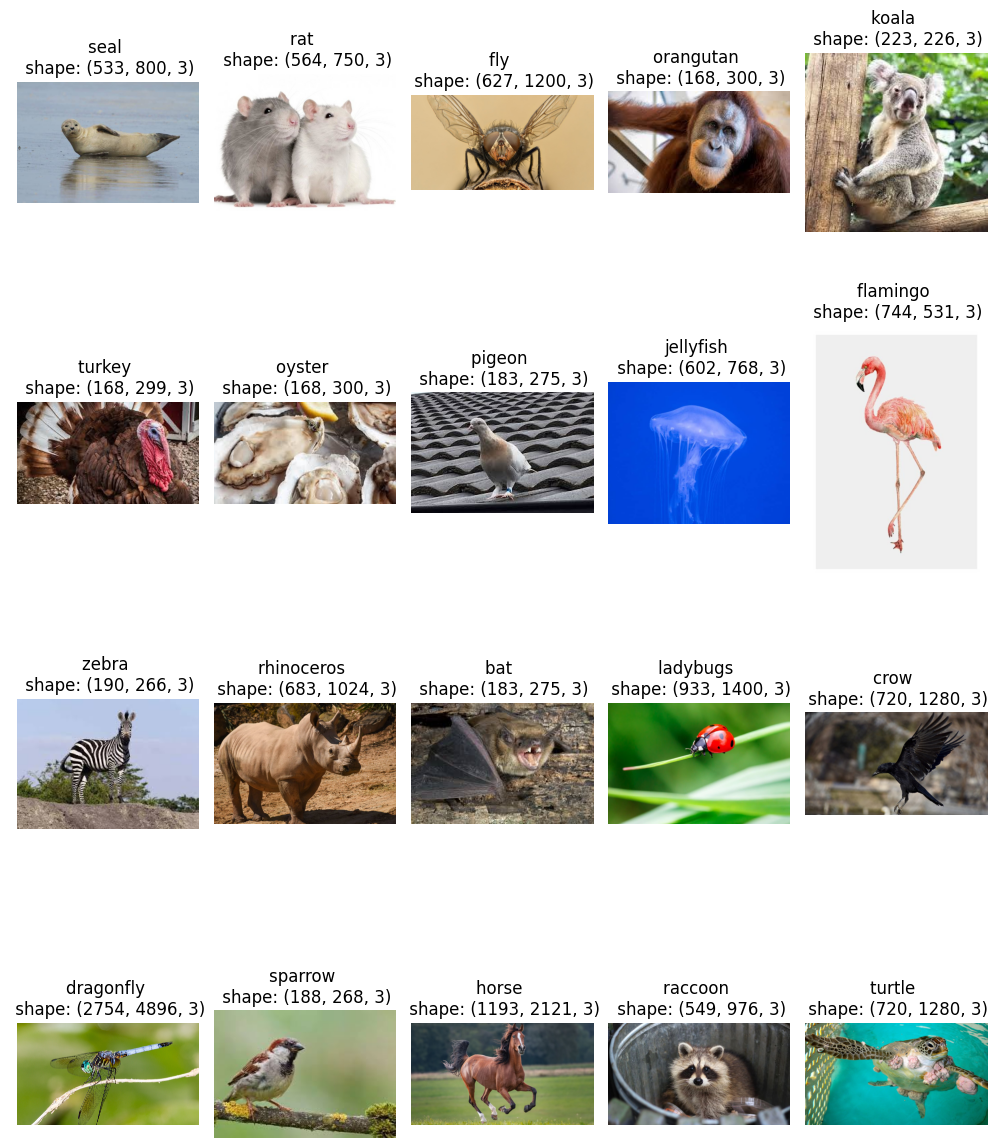

In [118]:
plt.figure(figsize=(10,15))
for i, class_name in enumerate(classes[:20]):
  class_path = os.path.join(dataset_path, class_name)
  image_name = os.listdir(class_path)[0]
  image_path = os.path.join(class_path, image_name)
  image = plt.imread(image_path)

  plt.subplot(4, 5, i+1)
  plt.imshow(image)
  plt.title(f'{class_name} \n shape: {image.shape}')
  plt.axis('off')
  plt.tight_layout()
plt.show()

